# Lower the Image Resolutions

This notebook will walk through the HOG feature extraction and PCA analysis.

In [ ]:
!pip install pillow

In [ ]:
import pandas as pd
import json
import os
import shutil #save images
from tqdm import tqdm #progress bar
import cv2
import matplotlib.pyplot as plt

# lowering the resolution
from PIL import Image

## Mount Google Drive and GCS

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Authenticate.
from google.colab import auth
auth.authenticate_user()

In [ ]:
# Install Cloud Storage FUSE.
!echo "deb https://packages.cloud.google.com/apt gcsfuse-`lsb_release -c -s` main" | sudo tee /etc/apt/sources.list.d/gcsfuse.list
!curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | sudo apt-key add -
!apt -qq update && apt -qq install gcsfuse

deb https://packages.cloud.google.com/apt gcsfuse-jammy main
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0Warning: apt-key is deprecated. Manage keyring files in trusted.gpg.d instead (see apt-key(8)).
100  2659  100  2659    0     0  18202      0 --:--:-- --:--:-- --:--:-- 18337
OK
56 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: https://packages.cloud.google.com/apt/dists/gcsfuse-jammy/InRelease: Key is stored in legacy trusted.gpg keyring (/etc/apt/trusted.gpg), see the DEPRECATION section in apt-key(8) for details.
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
The following NEW packages will be installed:
  gcsfuse
0 upgraded, 1 n

In [ ]:
# Mount a Cloud Storage bucket or location
mount_path = "281-project-d5d834b8-2d7c-11ef-91d5-b89a2a9d8518"
local_path = f"/mnt/gs/{mount_path}"

!mkdir -p {local_path}
!gcsfuse --implicit-dirs {mount_path} {local_path}

{"timestamp":{"seconds":1721286616,"nanos":144022092},"severity":"INFO","message":"Start gcsfuse/2.3.2 (Go version go1.22.4) for app \"\" using mount point: /mnt/gs/281-project-d5d834b8-2d7c-11ef-91d5-b89a2a9d8518\n"}
{"timestamp":{"seconds":1721286616,"nanos":150244057},"severity":"INFO","message":"GCSFuse mount command flags: {\"AppName\":\"\",\"Foreground\":false,\"ConfigFile\":\"\",\"MountOptions\":{},\"DirMode\":493,\"FileMode\":420,\"Uid\":-1,\"Gid\":-1,\"ImplicitDirs\":true,\"OnlyDir\":\"\",\"RenameDirLimit\":0,\"IgnoreInterrupts\":true,\"CustomEndpoint\":null,\"BillingProject\":\"\",\"KeyFile\":\"\",\"TokenUrl\":\"\",\"ReuseTokenFromUrl\":true,\"EgressBandwidthLimitBytesPerSecond\":-1,\"OpRateLimitHz\":-1,\"SequentialReadSizeMb\":200,\"AnonymousAccess\":false,\"MaxRetrySleep\":30000000000,\"StatCacheCapacity\":20460,\"StatCacheTTL\":60000000000,\"TypeCacheTTL\":60000000000,\"KernelListCacheTtlSeconds\":0,\"HttpClientTimeout\":0,\"MaxRetryDuration\":-1000000000,\"RetryMultiplier

In [ ]:
#test mounting
os.listdir(local_path)

['preprocessed-data', 'raw-data']

## List all the directories containing our images

In [ ]:
downsampled_path = f"{local_path}/raw-data/downsampled-data"
no_banner_path = f"{local_path}/raw-data/preprocessed_data"

# Create output directory if it doesn't exist
red_only_path = os.path.join(local_path, 'raw-data', 'preprocessed_data_red')
os.makedirs(red_only_path, exist_ok=True)

#test makedir"
os.listdir(f"{local_path}/raw-data/")

['downsampled-data',
 'low_resolution_images',
 'orinoquia-camera-traps',
 'preprocessed_data',
 'preprocessed_data_red']

## Lower Resolution

As instructed, working with the images as is, will be expensive. This is due to the high quality, which isn't needed for our problem.

In [ ]:
def lower_resolution(name, input_path, output_path, new_width, new_height):
  """
  Function to lower the resolution of a single image
  @params:
    - name        -> resulting image transformation name
    - input_path  -> where the image is originally stored
    - output_path -> where the output image is stored
    - new_width   -> updated width size
    - new_height  -> updated height size
  """
  with Image.open(input_path) as img:
    img = img.resize((new_width, new_height))
    img.save(f"{output_path}/{name}")


In [ ]:
# create the low res folder:
low_res = os.path.join(local_path, 'raw-data', 'low_resolution_images')
os.makedirs(low_res, exist_ok=True)

# make sure it worked
os.listdir(f"{local_path}/raw-data/")

['downsampled-data',
 'low_resolution_images',
 'orinoquia-camera-traps',
 'preprocessed_data',
 'preprocessed_data_red']

In [ ]:
#### call the lower_resolution function and store the output
low_res_path = f"{local_path}/raw-data/low_resolution_images"
for image in os.listdir(no_banner_path)[:10]:
  # running on example of (600,600)
  lower_resolution(image, f"{no_banner_path}/{image}", low_res_path, 600, 600)

(1440, 1920, 3)
(600, 600, 3)
(1440, 1920, 3)
(600, 600, 3)


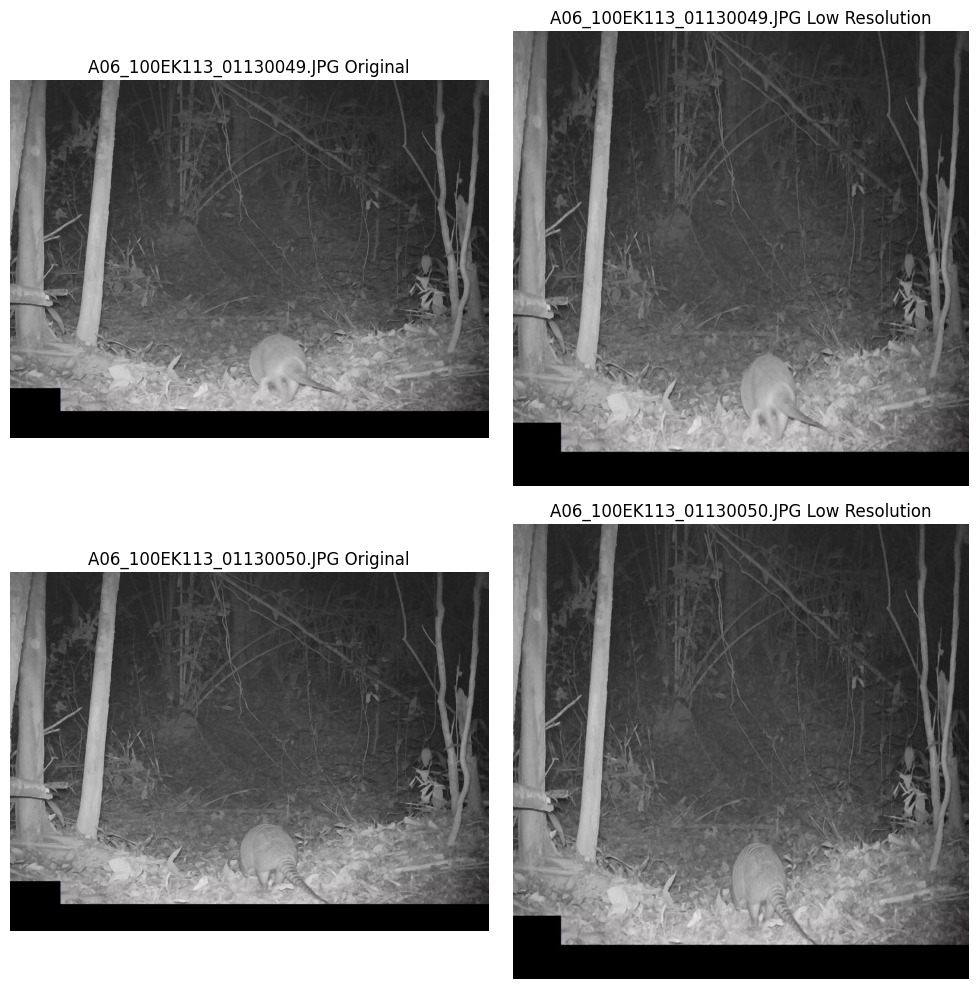

In [ ]:
# verify examples to see the resolution differences
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10), tight_layout=True)
counter = 0
for i, j in zip(os.listdir(no_banner_path)[:2], os.listdir(low_res_path)[:2]):
  temp_original = plt.imread(f"{no_banner_path}/{i}")
  temp_low_res = plt.imread(f"{low_res_path}/{j}")
  print(temp_original.shape)
  print(temp_low_res.shape)

  # add the graphs to the figure split by resolution
  axs[counter, 0].set_title(f"{i} Original")
  axs[counter, 0].axis('off')
  axs[counter, 0].imshow(temp_original)
  axs[counter, 1].set_title(f"{i} Low Resolution")
  axs[counter, 1].axis('off')
  axs[counter, 1].imshow(temp_low_res)
  counter+=1
plt.show()